In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram

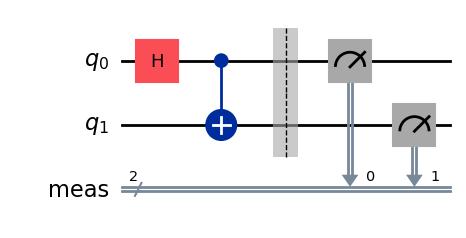

In [2]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure_all()
circuit.draw(output='mpl')

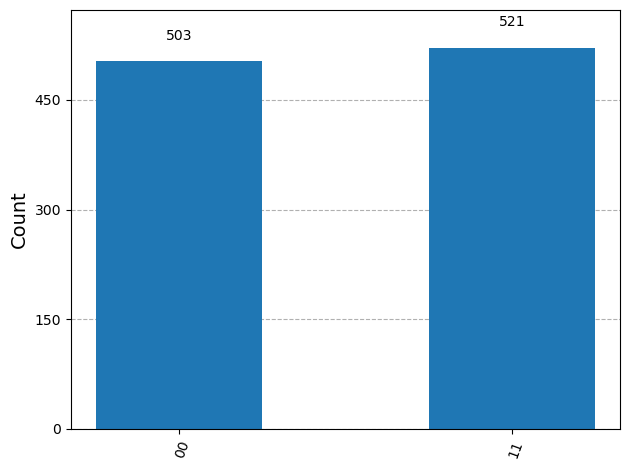

In [3]:
# UPDATE: Code updated after recording to resolve breaking changes from Qiskit 1.0
from qiskit.providers.basic_provider import BasicProvider
simulator = BasicProvider().get_backend('basic_simulator')
compiled_circuit = transpile(circuit, simulator)
result = simulator.run(compiled_circuit).result()
plot_histogram(result.get_counts())

## Modifications due to breaking changes to qiskit libraries / modules & IBM Cloud
- see https://github.com/Qiskit/qiskit-aer/issues/2071

### IBM Cloud
- see https://quantum.cloud.ibm.com/
- Cloud simulators retired: see https://quantum.cloud.ibm.com/docs/en/migration-guides/local-simulators


In [4]:
from dotenv import load_dotenv
import os
load_dotenv()
api_key = os.getenv('IBM_API_KEY')

In [5]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime.fake_provider import FakeTorino, FakeBrisbane
service = QiskitRuntimeService("ibm_quantum_platform", api_key)
service.backends()

qiskit_runtime_service._resolve_cloud_instances:WARNING:2025-09-21 19:30:06,678: Default instance not set. Searching all available instances.


[<IBMBackend('ibm_torino')>, <IBMBackend('ibm_brisbane')>]

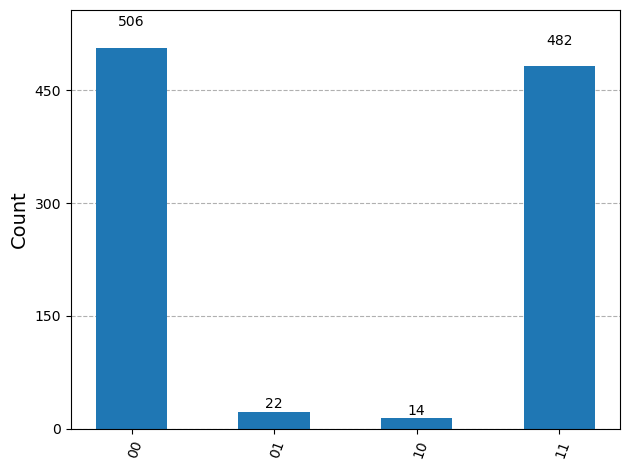

In [6]:
backend = FakeTorino()
transpiled_circuit = transpile(circuit, backend)
transpiled_circuit.draw('mpl')
job = backend.run(transpiled_circuit)
counts = job.result().get_counts()
plot_histogram(counts)